In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
from PIL import Image # For handling the images
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Embedding
from keras.layers import Conv2D, MaxPooling2D,TimeDistributed
from keras.layers import Dropout
import keras.optimizers


C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
lookup_gesture = dict()
reverselookup_gesture = dict()
lookup_seq = dict()
reverselookup_seq = dict()

seqLens=[]
count = 0
count_seq = 0
for i in range(0, 2):
    
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # If running this code locally, this is to ensure you aren't reading in hidden folders
                for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+
                                           '/sequences/' + j + '/' + 'train' + '/'):
                    imgseq = 0
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+
                                    '/sequences/' + j + '/' + 'train' + '/' + k + '/'):
                            lookup_seq[j] = count_seq
                            reverselookup_seq[count_seq] = j
                            count_seq = count_seq +1
                            imgseq= imgseq +1
                    seqLens.append(imgseq)
                            
                    
count_seq
Seqlength=max(seqLens)
Seqlength

39

In [30]:
x_train = []
X_train =[]
y_train = []
final_img_count_train = 0
seq_img_count  = 0
ges_img_count = 0
sub_img_count = 0
img_count = 0
blended_image = Image.new('L',(320,120),"black")
for i in range(0, 2): # select 2 subject areas only
    ges_img_count = 0
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # Again avoid hidden folders
             seq_img_count = 0 # To tally images of a given gesture
        for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                  + j + '/' + 'train' + '/'):
               
                if not k.startswith('.'): # Again avoid hidden folders
                    img_count = 0
                   # x_train.clear()
                    
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'train' + '/' + k + '/'):
                        img = Image.open('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'train' + '/' + k + '/' + l).convert('L')
                        # Read in and convert to greyscale
                        img = img.resize((320, 120))
                        arr = np.array(img)
                        x_train.append(arr) 
                        img_count = img_count + 1
                        #y_values = np.full((img_count, 1), lookup_seq[j]) 
                        #y_values = lookup_seq[j]
                       # y_values = str(j)
                        #y_train.append(y_values)   
                    if img_count < (Seqlength):
                        for m in range (img_count , Seqlength):
                            arr=np.array(blended_image)
                            x_train.append(arr)
                            m = m + 1
                            
                    y_values = str(j)
                    y_train.append(y_values)
                    #X_train.append(x_train)
                    seq_img_count = seq_img_count + img_count
                        
                
        ges_img_count = ges_img_count + seq_img_count
            #print("ges_img_count",ges_img_count)
    sub_img_count = sub_img_count + ges_img_count
    #print("sub_img_count",sub_img_count)
final_img_count_train = final_img_count_train + sub_img_count        
print(final_img_count_train)
x_train = np.array(x_train, dtype = 'float32')
y_train = np.array(y_train)
#y_train = y_train.reshape(final_img_count_train, 1) # Reshape to be the correct size
#y_train = y_train.reshape(1, -1)

11624


In [31]:
encoder = LabelBinarizer()
y_train1 = encoder.fit_transform(y_train)
print(y_train1 )

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [32]:
print(x_train.shape)
print(y_train1.shape)
len(x_train)
j

(27963, 120, 320)
(717, 11)


'zoom_out'

In [33]:
x_test = []
X_test=[]
y_test = []
final_img_count_test = 0
seq_img_count  = 0
ges_img_count = 0
sub_img_count = 0
img_count = 0
for i in range(0, 2): # select 2 subject areas only
    ges_img_count = 0
    for j in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'):
        if not j.startswith('.'): # Again avoid hidden folders
            seq_img_count = 0 # To tally images of a given gesture
            for k in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                + j + '/' + 'test' + '/'):
                if not k.startswith('.'): # Again avoid hidden folders
                   # x_test.clear()
                    img_count = 0
                    for l in os.listdir('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                        + j + '/' + 'test' + '/' + k + '/'):
                        img = Image.open('C:/MITB/Term 4/AML/Project/leaphandgestuav/MultiModHandGestUAV/0'+str(i)+'/sequences/'
                                          + j + '/' + 'test' + '/' + k + '/' + l).convert('L')
                        # Read in and convert to greyscale
                        img = img.resize((320, 120))
                        arr = np.array(img)
                        x_test.append(arr) 
                        img_count = img_count + 1
                        #y_values = np.full((img_count, 1), lookup_seq[j]) 
                        #y_values = lookup_seq[j]
                        #y_values = str(j)
                        #y_test.append(y_values)
                        
                    #X_test.append(x_test)
                    if img_count < max(seqLens):
                        for m in range (img_count , Seqlength):
                            #x_test.append(np.ones((120,320)))
                            arr=np.array(blended_image)
                            x_test.append(arr)
                            m = m + 1
                    y_values = str(j)
                    y_test.append(y_values)
                  #  X_test.append(x_test) 
                    seq_img_count = seq_img_count + img_count
                    
                     
            ges_img_count = ges_img_count + seq_img_count
            #print("ges_img_count",ges_img_count)
    sub_img_count = sub_img_count + ges_img_count
    #print("sub_img_count",sub_img_count)
final_img_count_test = final_img_count_test + sub_img_count        
print(final_img_count_test)
x_test = np.array(x_test, dtype = 'float32')
y_test = np.array(y_test)
#y_test = y_test.reshape(final_img_count_test, 1) # Reshape to be the correct size
#y_test = y_test.reshape(1, -1)

2935


In [34]:

encoder = LabelBinarizer()
y_test1 = encoder.fit_transform(y_test)
print(y_test1.shape)
print(x_test.shape)
#x_test =  sequence.pad_sequences(X_test, maxlen=Seqlength)
#x_test.shape

(179, 11)
(6981, 120, 320)


In [35]:
x_train1 = x_train.reshape((y_train.shape[0],Seqlength,120, 320,1))
x_train1 /= 255
x_test1 = x_test.reshape((y_test.shape[0],Seqlength,120,320,1))
x_test1 /= 255
x_train.shape
#y_train1 = y_train1.reshape(final_img_count_train,Seqlength,11)
#y_train1.shape 


(27963, 120, 320)

0 zoom_out


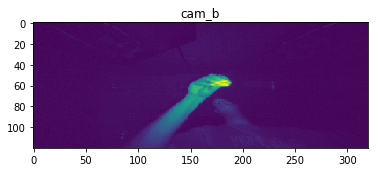

1 zoom_out


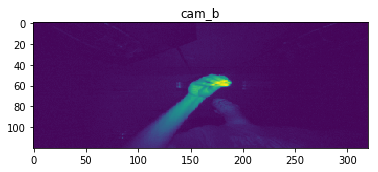

2 zoom_out


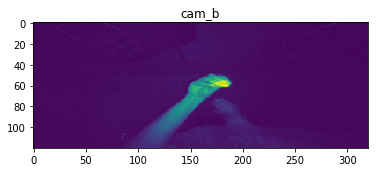

3 zoom_out


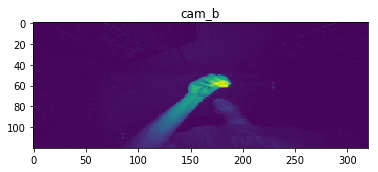

4 zoom_out


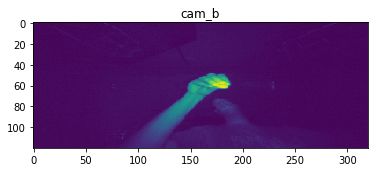

5 zoom_out


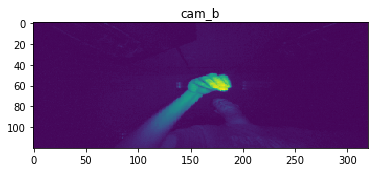

6 zoom_out


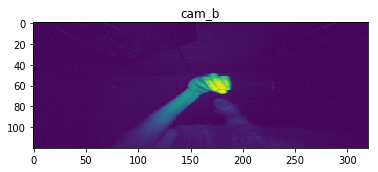

7 zoom_out


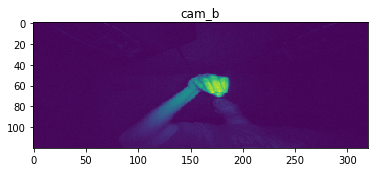

8 zoom_out


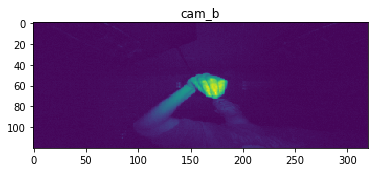

9 zoom_out


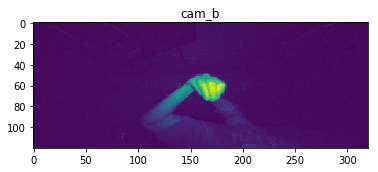

10 zoom_out


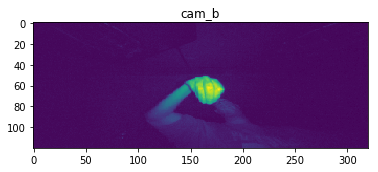

11 zoom_out


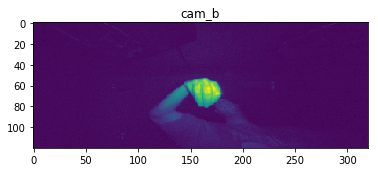

12 zoom_out


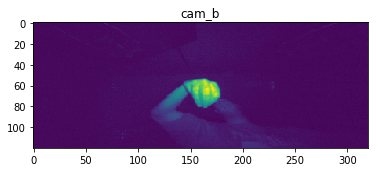

13 zoom_out


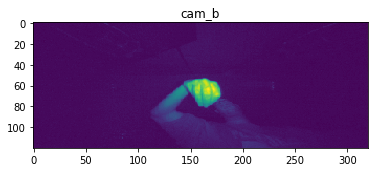

14 zoom_out


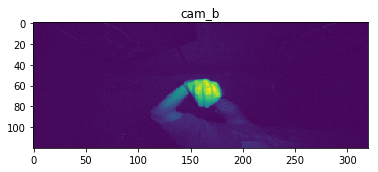

15 zoom_out


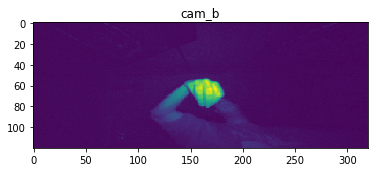

16 zoom_out


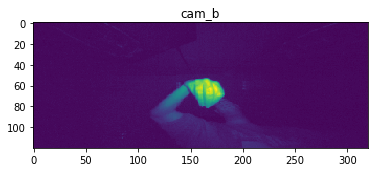

17 zoom_out


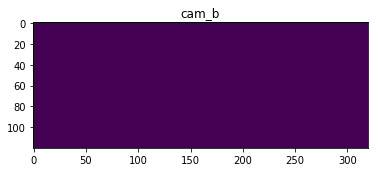

18 zoom_out


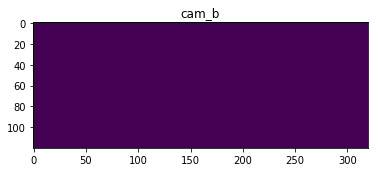

19 zoom_out


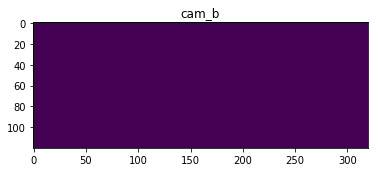

In [36]:
from random import randint

for i in range(0,20) :
    #for j in range (0,Seqlength):
        plt.imshow(x_train[i])
        print(i,j)
        plt.title(y_train[i])
        plt.show()

In [111]:
cnn = Sequential()
cnn.add(Conv2D(1, (2,2), activation='relu', padding='same', input_shape=(120,320,1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 120, 320, 1)       5         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 60, 160, 1)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 9600)              0         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [112]:
# define LSTM model
model = Sequential()
model.add(TimeDistributed(cnn, input_shape=(Seqlength,120,320,1)))
model.add(LSTM(Seqlength))
model.add(Dense(11,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_28 (TimeDis (None, 39, 9600)          5         
_________________________________________________________________
lstm_27 (LSTM)               (None, 39)                1503840   
_________________________________________________________________
dense_27 (Dense)             (None, 11)                440       
Total params: 1,504,285
Trainable params: 1,504,285
Non-trainable params: 0
_________________________________________________________________


In [113]:

model.compile(optimizer= 'RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

 

In [116]:
    
epochs =5

model.fit(x_train1, y_train1, epochs=epochs, batch_size=Seqlength) #,validation_data =(x_test,y_test1))

Epoch 1/5
717/717 [==============================] - 117s 163ms/step - loss: 1.5691 - acc: 0.5007
Epoch 2/5
717/717 [==============================] - 121s 169ms/step - loss: 1.4517 - acc: 0.5579
Epoch 3/5
717/717 [==============================] - 119s 166ms/step - loss: 1.3633 - acc: 0.5844
Epoch 4/5
717/717 [==============================] - 112s 156ms/step - loss: 1.2247 - acc: 0.6248
Epoch 5/5
717/717 [==============================] - 111s 155ms/step - loss: 1.1080 - acc: 0.6527


In [120]:
[loss, acc] = model.evaluate(x_test1,y_test1,verbose=1)
print("Accuracy:" + str(acc) + ":" + "Loss:" + str(loss))

179/179 [==============================] - 16s 87ms/step
Accuracy:0.653631285249188:Loss:1.1129042216519405


In [119]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_LSTM.h5")
print("Saved model to disk")

Saved model to disk


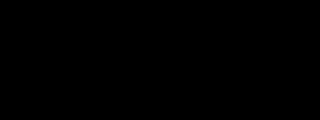

In [29]:
blended_image = Image.new('L',(320,120),"black")
blended_image